#### MA124 Maths by Computer
# Project: Clustering in real-world networks

#### Background
A network in its simplest form is a graph representation of a real-world system in which nodes are entities of 
interest (e.g., individuals) and edges are pairwise interactions between entities (e.g., connections on social media). 
Networks are useful representations in a wide range of applications, such as sociology, biology, economics, transportation, and so on. 

A broad range of network features can be characterised via properties of matrices commonly used to describe networks. *Communities* or *clusters* are a very commonly studied type of network feature. These are loosely defined as sets of nodes that are strongly connected in a network (e.g., echo chambers in a Twitter social network, brain regions contributing to similar functions in a neuronal network). In this project, we will explore how two matrices known as the *adjacency matrix* and the *Laplacian* can be used to decompose real-world networks into communities. 

#### Suggested reading

*Some references on Community Detection more broadly:* 

1- Mason A. Porter's paper *Communities in Network*, The American Mathematical Society, 2009. Link here: https://arxiv.org/abs/0902.3788

2 - S. Fortunato's survey paper *Community detection in graphs*, Physics Report, 2010. Link here: https://arxiv.org/abs/0906.0612?context=cs

3 - S. Fortunato and Mark. E. J. Newman's opinion piece, *20 Years of Community Detection*, Nature Physics, 2022. Link here: https://arxiv.org/abs/2208.00111

*Some references on Spectral Bipartitioning:* 

1 - Mark E. J. Newman's paper *Finding community structure in networks using the eigenvectors of matrices*, Physical Review E, 2009. Look at Section II *Graph partitioning and the Laplacian matrix* Link here: https://arxiv.org/abs/physics/0605087 

2 - Mark E. J. Newman's book *Networks: An Introduction*: Section 11.5 *Spectral partitioning* in the Chapter *Matrix algorithms and graph partitioning*, 2010. Link here: https://math.bme.hu/~gabor/oktatas/SztoM/Newman_Networks.pdf

3 - Ulrike von Luxburg, *A tutorial on spectral clustering*, Statistics and Computing, 2006. Link here: https://arxiv.org/abs/0711.0189

#### Struture of project

There are 6 tasks in the document below, tasks A1-A4 in Section A and then tasks B1-B2 in section B. Your group should do all of these tasks. A1-A4 are worth approximately 60% of the credit for this submission and tasks B1-B2 are worth approximately the other 40%.

#### Notes on submission
Read through the document **MA124 Maths by Computer Tutor Group Projects_Information for Students_23_24.pdf** on the MA124 Moodle page.

Before submitting see the notes at the end of this document.

#### Allowed libraries for this project: 
networkx numpy matplotlib 

This means that you may include these lines of code at the start of any of your code cells (and please use the aliases given below).

In [32]:
import networkx as nx #for analysing networks
import numpy as np #for maths functionality, including vectors and matrices
import matplotlib.pyplot as plt #for visualising data

## Section A - (worth approximately 60% of the marks)

Let us consider the Zachary Karate Club as a first real-world network example. The Zachary Karate Club is a much studied network in network science. The data was collected about members of a university karate club by Wayne Zachary in 1977. 

Each node represents a member of the club, and each edge represents a tie between two members of the club. A frequently discussed problem using this dataset is to find the two sets of people into which the karate club split after an argument between two teachers in the club.

[ NB: There is a trophy named after this data set that is awarded to the first scientist at a conference on networks who uses the Zachary Karate Club as an example in their talk. You can see past trophy holders here: https://networkkarate.tumblr.com ]

### Task A1 - Preliminaries [approximately 5%]

- Compile the three cells below. These consist of (1) loading the Zachary Karate Club network data; (2) visualizing the network; and (3) visualizing its corresponding adjacency matrix. 
- Write code that prints the size of the adjacency matrix using a numpy function of your choice (e.g., shape) and makes sure its entries are 0 and 1 using a numpy function of your choice (e.g., unique), where 0 (resp. 1) indicates the absence (resp. the presence) of a tie between two club members. 

After running them, add code cell(s) below the following three cells in which to answer the second part of the above.

In [33]:
ZKC_graph = nx.karate_club_graph() # load the Zachary Karate Club network data from the NetworkX package
print("The number of nodes is", ZKC_graph.number_of_nodes()) # print the number of nodes
print("The number of edges is", ZKC_graph.number_of_edges()) # print the number of edges

The number of nodes is 34
The number of edges is 78


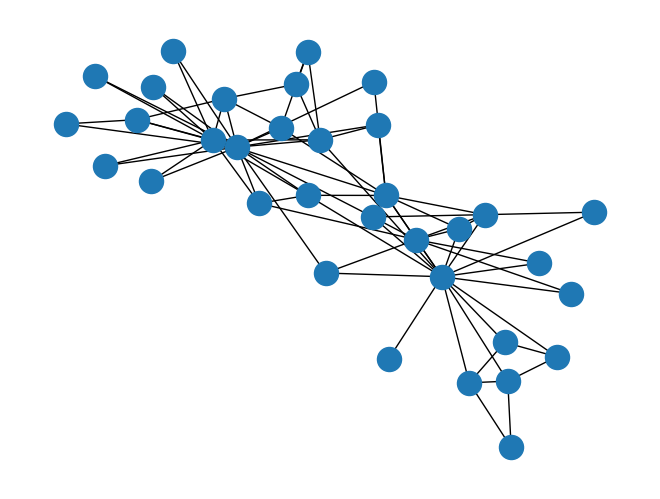

In [34]:
positions = nx.spring_layout(ZKC_graph) # generate a layout for the nodes (you can try different ones by re-compiling this cell), and comment this line out or save the layout if you want to use the same one for subsequent visualizations
nx.draw(ZKC_graph, positions, cmap=plt.cm.prism) # visualize the network (note: for those of you interested in further explore network visualizations, Gephi https://gephi.org is a useful tool)

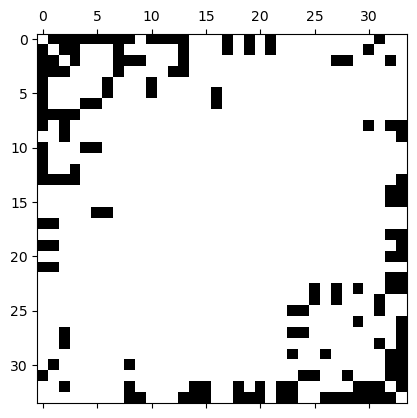

In [35]:
A = nx.to_numpy_array(ZKC_graph) # convert the network into an adjacency matrix 
A = np.where(A >= 1, 1, 0) # binarize the network (the entry is 1 for any nonzero edge weight and 0 otherwise)
plt.spy(A) # visualize the adjacency matrix of the network (with black = 1 and white = 0)

---
### Task A2 - Degrees [approximately 15%]
#### A2a
What does the function below return for each node $i$ of the network? 

Add a markdown cell below the code cell below in which to answer this question.

In [36]:
def deg_node(A,i):
    k = 0
    for j in range(A.shape[0]):
        k = k + A[i][j]
    return k

#### A2b 
Write a function that does the following: 
 
- takes as input a matrix A      
- defines a matrix B equal to A minus the transpose of A      
- returns the unique values in B

Then consider how this function could be used to determine whether a matrix is symmetric. Specifically

- Show the output of the function applied to the adjacency matrix A of the Zachary Karate Club. 
- Is the matrix symmetric? What would happen if I considered a row sum instead of a column sum in A2a (i.e., if I swap $i$ and $j$ in the line "k = k + A[ i ] [ j ]") when A is symmetric? 

*Add code and markdown cell(s) below this one to answer these questions.*

#### A2c
Write a function that does the following: 

- takes as input the adjacency matrix of a network
- computes the degree of each node using a code similar to that in A2a
- stores the node degrees in a numpy array 
- returns the numpy array of node degrees as an output 

Apply this function to the Zachary Karate Club and plot a histogram of its node degrees. 

*Add code cell(s) below to answer this.*

#### A2d 
This is about the Zachary Karate Club network shown below which has nodes colored according to their degree (a darker shade signifies a larger degree). 

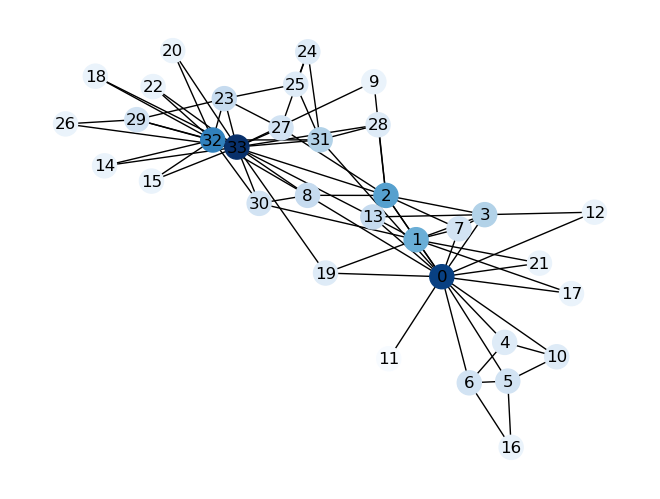

In [37]:
k_seq = ZKC_graph.degree()
k_seq_np = np.array(k_seq)
k_seq_1darray = k_seq_np[:,1]
nx.draw(ZKC_graph, positions,node_color=k_seq_1darray, cmap=plt.cm.Blues,
                            with_labels=True)

- Compute the mean, standard deviation, max, and minimum of the degree sequence.
- Which two nodes in the Zachary Karate club network would you expect to have the two largest degrees? 
- Loosely speaking, what does it mean for a probability distribution to be "heavy-tailed"? 
- Can you give an example of a probability distribution that has been extensively studied when analyzing degree sequences of real-world networks and can be qualified as "heavy-tailed"?
- Can you give two properties that this probability distribution satisfies?

*Add code and markdown cell(s) below to answer the questions above.* 

---
### Task A3: Laplacian [approximately 20%]
The *Laplacian* $L$ of a symmetric adjacency matrix $A$ is defined as $L = D - A$, where $D$ is a diagonal matrix with $(i,i)$th entry the degree $k_i$ of node $i$. The Laplacian plays many important roles in understanding the structure of networks, and one such role is in understanding the community structure of networks. 

#### A3a 
- Write a function that takes an adjacency matrix as an input and returns the Laplacian of the adjacency matrix as an output. 
- What are the row and column sums of the Laplacian matrix equal to? 
- Verify your answer for the Zachary Karate Club adjacency matrix. 

*Add code and markdown cell(s) below to answer these questions.*

#### A3b
A vector $v \in \mathbb{R}^{N\times 1}$ is said to be an *eigenvector* of a matrix $A \in \mathbb{R}^{N\times N}$ if it satisfies the equality $Av = \lambda v$, for some scalar $\lambda \in \mathbb{R}$. In other words, $v$ is a vector that gets scaled by $\lambda$ when one applies the linear transformation $A$ to it. The scalar $\lambda$ is called the *eigenvalue* of $v$. 

- Using the function *np.linalg.eigh* compute the eigenvectors and eigenvalues of the Laplacian of the Zachary Karate Club. 
- Display the eigenvector corresponding to the first and second smallest eigenvalues.

*Add code cell(s) below to answer the above.*

#### A3c

Using A3a, can you explain why 0 is always an eigenvalue of a Laplacian matrix with a constant eigenvector?

(Hint: Mutiplying a matrix by a vector whose entries are all equal to 1 is equivalent to summing the columns of the matrix.)

*Add markdown cell(s) below to answer the above.*

---
### Task A4: Spectral bipartioning [approximately 20%]

#### A4a
Suppose we have a partition of a network into two sets of nodes. The number of edges $R$ falling between these sets is called the cut size and is given by 
\begin{equation*}
R = \frac{1}{2}\sum_{\substack{i,j \text{ in} \\\text{different}\\ \text{sets}}} A_{ij}\,.
\end{equation*}
Show that $R$ can be rewritten as $R = \frac{1}{4}s^TLs$ where 

\begin{equation*}  
s_i = 
     \begin{cases}
       +1 &\quad\text{if node } i \text{ belongs to set } 1 \\
       -1 &\quad\text{if node } i \text{ belongs to set } 2\,. \\
     \end{cases}
\end{equation*}

*Add a markdown cell below to answer this.*

#### A4b
One way to find clusters is to minimize the cut size of a partition. The eigenvector corresponding to the second smallest eigenvalue of the Laplacian is called the *Fiedler vector*.
It can be shown that an approximate solution to cut size minimization for the case of two clusters can be obtained through the Fiedler vector. Using the signs of the Fiedler eigenvector, one can write a heuristic algorithm that splits the nodes in the Karate Club into two clusters. One can then encode the clustering using a partition array.
- Can you explain what each line of the function below does? How is a clustering encoded in the output partition? 

*Add a markdown cell below the code block below to answer this.*

In [38]:
def spectral_bipartitioning(A, k_seq):
    laplacian_matrix = np.diagflat(k_seq) - A
    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
    index_1 = np.argsort(eigenvalues)[1]
    partition = [val >= 0 for val in eigenvectors[:, index_1]]
    partition_array = 1*np.reshape(partition, A.shape[0])
    return partition_array

#### A4c 
- Apply the function above to the adjacency matrix of the Zachary Karate Club. 
- Using the visualization technique in A2d and swapping the colormap "plt.cm.Blues" with "plt.cm.prism", visualize the network with nodes colored based on their community.
- Are the two highest degree nodes in different communities? How might you interpret the resulting two communities? 

*Add code and markdown cell(s) below to answer this question.*

---
---
### Section B (worth approximately 40%) 

### Task B1: Analyse a network of your choice.

#### B1a
Go to the website http://konect.cc and download network data for a **small (e.g., $n \leq 50$), unipartite (i.e., one type of node), unweighted, and undirected (i.e., symmetric adjacency matrix)** network of your choice. Examples include: 

- The Zachary Karate Club (don't choose this one, unless it's for practice!)
- HIV
- Zebra
- Dolphins (note: the input file for Dolphins is already available as part of the assignment, for those that prefer not to follow the steps below)

The steps to download a network of your choice and load it into a Jupyter Notebook are as follows:

a. Choose a network from http://konect.cc/networks/ and click on the corresponding link;

b. Click on "Dataset available for download"; NB: The README file in the downloaded folder contains a brief description of the network and data.

c. Save the "out.FILENAME" in the same folder as your Jupyter notebook; 

d. Adapt the cell below that uses the Zachary Karate Club network to the network that you chose.

*Add code and markdown cell(s) below to answer this question.*

In [39]:
fh = open("out.ucidata-zachary", "rb")
ZKC_graph_Konect = nx.read_edgelist(fh, comments='%')
fh.close()
print("The number of nodes is", ZKC_graph_Konect.number_of_nodes()) # print the number of nodes
print("The number of edges is", ZKC_graph_Konect.number_of_edges()) # print the number of edges

The number of nodes is 34
The number of edges is 78


#### B1b
Using similar steps as for part A, apply the spectral bipartitioning algorithm to the real-world network you chose and visualize the communities. How might you interpret communities in the context of this real-world network? 

*Add code and markdown cell(s) below to answer this question.*

### Task B2: Explore a different clustering method.


Choose another community detection approach (e.g., from https://networkx.org/documentation/networkx-2.4/reference/algorithms/community.html). Explain the method you chose, then apply it to the network you downloaded and/or to the Zachary Karate Club network, and compare the output to spectral bipartitioning (e.g., using a similarity measure known as the "Jaccard score" https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html). What are some of the main differences and similarities between the two approaches? How might you go about extending the spectral bipartioning approach to detect more than two communities? 

*Add code and markdown cell(s) below to answer this question.*

## Notes about this submission

You will submit a single Jupyter notebook for this project assignment. Details will be provided for this on the MA124 Moodle page.

- The last thing you should do before submitting the notebook is to Restart Kernel and Run All Cells. You should then save the notebook and submit the .ipynb file. **You will lose marks if you submit a notebook that has not been run.**

- You are expected to add code and markdown cells to this document as appropriate to provide your responses to the tasks. Instructions about this are given throughout but feel free to add markdown cells at any point to provide clarity or comments.

- Likewise, to help the reader, please provide appropriate comments in your code (for example functions or blocks of code should have comments about what they do, variables should be described in comments, as appropriate).